This notebook is a first exploration of querying the sqlite data and plotting it.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadirectory = "/media/sf_sharedfolder/Emotion/emrecdemstudydata"
databasefile = datadirectory + "/emrecdem.db"

In [5]:
q1 = """ SELECT videofeatures.time, audiofeatures.pitch, videofeatures.*
FROM videofeatures
INNER JOIN audiofeatures USING(id, time, participant_id, experiment_id)
WHERE pitch < 2000;"""

conn = sqlite3.connect(databasefile)
df = pd.read_sql_query(q1, conn)
featurenames = df.columns.values

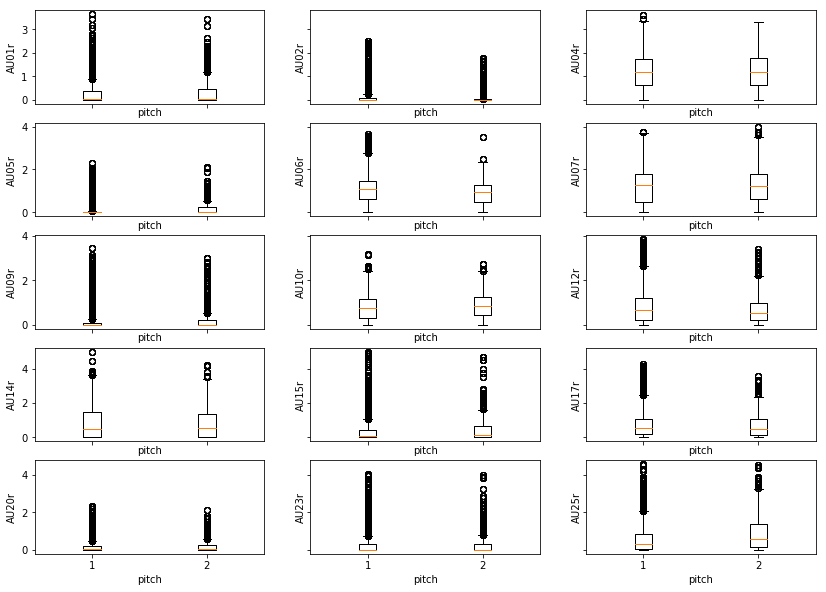

In [8]:
ncols = 3
nrows = 5

fig, ax = plt.subplots(nrows, ncols, sharex='col', sharey='row')
fig.set_size_inches(14, 2*nrows)
cnt = 0
for i in range(nrows):
    for j in range(ncols):
        
        yvar = featurenames[cnt+6]
        cnt = cnt + 1
        df_low = df[df[yvar].notnull() & (df['pitch'] < 300)]
        df_high = df[df[yvar].notnull() & (df['pitch'] >= 300)]
        ax[i, j].boxplot([df_low[yvar],df_high[yvar]])
        ax[i, j].set(xlabel='pitch', ylabel=yvar)